A collection of dataset is available on the [MoleculeNet website](https://moleculenet.org/datasets-1). Demonstrations in this course will focus on the QM9 dataset which contains density functional theory (DFT) data for small molecules.

### Downloading QM9 dataset

You can download the CSV file from the website and upload it in Colab as shown in the GIF below. This is applicable to any dataset in any format.

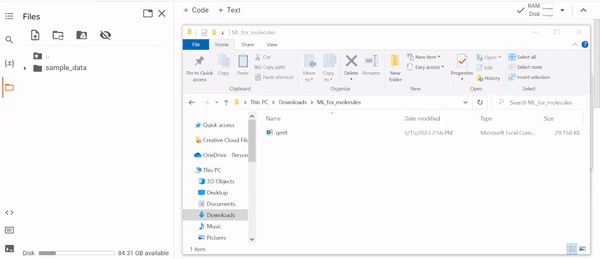

As we know the URL of the QM9 dataset CSV file, we will directly load the dataset into a pandas DataFrame for analysis.

In [ ]:
# import that pandas library
import pandas as pd

# load the dataframe as CSV from URL. 
# If you upload the file to Colab, replace the URL with the file name 
df = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/qm9.csv")

# look at the top 5 entries
df.head()

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028


### Analyzing the dataset

The molecules are represented by [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) in this dataset. To visualize the molecular structure, we will use [RDKit](https://www.rdkit.org/). 

RDKit is not installed in Colab, so we will install it before visualization.

In [ ]:
# install rdkit
! pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 48.1 MB/s eta 0:00:00


In [ ]:
# import the Chem library for converting SMILES into RDKit molecules
from rdkit import Chem

# We will use MolToGridImage to visualize the 2D structure
from rdkit.Chem.Draw import MolsToGridImage

Let's get the last molecule in the dataset and generate the 2D representation from the corresponding SMILES. 

``df.tail`` gives the last five entries. If we pass ``1`` as argument to this function, we get the last entry 

In [ ]:
df.tail(1)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
133884,gdb_133885,C1N2C3C4C5OC13C2C45,3.64015,2.21764,1.93793,0.8626,69.48,-0.2316,0.0742,0.3058,...,0.127862,-400.633052,-400.627892,-400.626948,-400.662186,23.434,-1603.471865,-1614.455155,-1623.345075,-1492.24715


Now we will create a RDKit molecule object from the above SMILES and draw the structure

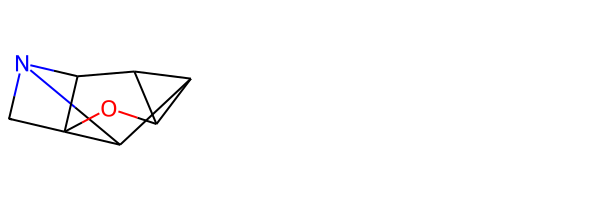

In [ ]:
# create the molecule object
mol = Chem.MolFromSmiles("C1N2C3C4C5OC13C2C45")

# draw the structure
MolsToGridImage([mol])

We can loop over several entries to look at a larger chuck of the dataset.

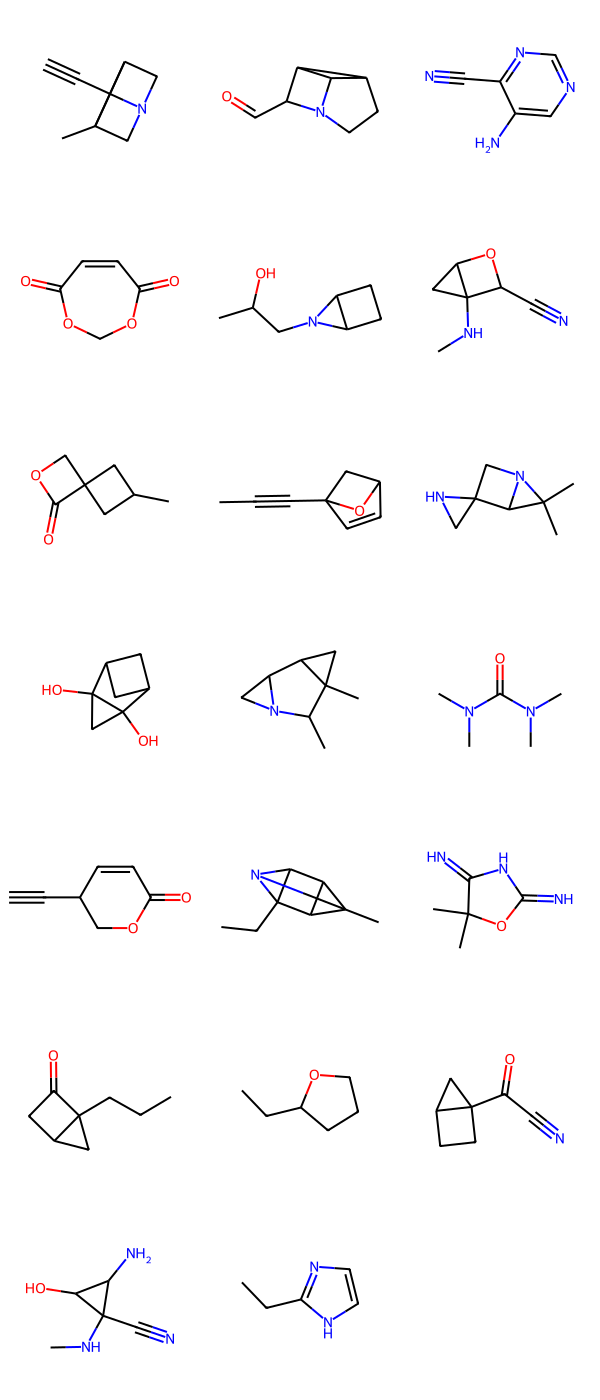

In [ ]:
# randomly select 20 entries from the dataframe
sample_df = df.sample(n=20)

# create a list of smiles
smiles_list = sample_df["smiles"].tolist()

# create the RDKit molecule objects with list comprehension
MolsToGridImage([Chem.MolFromSmiles(smile) for smile in smiles_list ])

If you think you need to remove some entries, you can remove them from the dataframe with ``dropna``

In [ ]:
sample_df.tail(4)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
2942,gdb_2943,CCC1CCCO1,5.70536,1.77367,1.47048,1.5051,67.58,-0.2373,0.0870,0.3243,...,0.172677,-310.936083,-310.928490,-310.927546,-310.968383,27.560,-1749.241578,-1761.363170,-1772.033333,-1625.138496
42196,gdb_42197,O=C(C#N)C12CC1CC2,2.92496,1.37127,1.03432,4.5215,76.59,-0.2788,-0.0820,0.1968,...,0.124251,-400.745178,-400.737118,-400.736174,-400.778330,29.701,-1673.831939,-1682.995453,-1691.885373,-1565.128555
103001,gdb_103002,CNC1(C#N)C(N)C1O,2.10609,1.40261,1.13313,3.8232,74.29,-0.2406,0.0148,0.2554,...,0.147265,-435.238098,-435.228410,-435.227465,-435.272449,35.461,-1685.250093,-1695.167873,-1705.243157,-1563.311917
1041,gdb_1042,CCc1[nH]ccn1,6.73652,1.92680,1.67619,3.4175,62.81,-0.2142,0.0354,0.2496,...,0.127282,-304.746925,-304.740221,-304.739277,-304.778331,24.253,-1470.353361,-1479.477969,-1487.776148,-1372.071019


In [ ]:
# drop the entry 103001
clean_df = sample_df.drop(103001)

# look at the 3 bottom entries
clean_df.tail(4)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
119533,gdb_119534,CCCC12CC1CC2=O,2.99596,1.05751,0.86811,2.9659,84.05,-0.2364,-0.0052,0.2311,...,0.181669,-387.094343,-387.085060,-387.084116,-387.128965,34.569,-2040.855051,-2053.694512,-2065.549412,-1899.954807
2942,gdb_2943,CCC1CCCO1,5.70536,1.77367,1.47048,1.5051,67.58,-0.2373,0.0870,0.3243,...,0.172677,-310.936083,-310.928490,-310.927546,-310.968383,27.560,-1749.241578,-1761.363170,-1772.033333,-1625.138496
42196,gdb_42197,O=C(C#N)C12CC1CC2,2.92496,1.37127,1.03432,4.5215,76.59,-0.2788,-0.0820,0.1968,...,0.124251,-400.745178,-400.737118,-400.736174,-400.778330,29.701,-1673.831939,-1682.995453,-1691.885373,-1565.128555
1041,gdb_1042,CCc1[nH]ccn1,6.73652,1.92680,1.67619,3.4175,62.81,-0.2142,0.0354,0.2496,...,0.127282,-304.746925,-304.740221,-304.739277,-304.778331,24.253,-1470.353361,-1479.477969,-1487.776148,-1372.071019


Here we only analyzed the molecular structure. One should also analyze the molecular property for missing entries or inconsistent data and remove it before doing any machine learning (ML).

Let's look at the ``gap`` property which the the HOMO-LUMO gap

<Axes: ylabel='Frequency'>

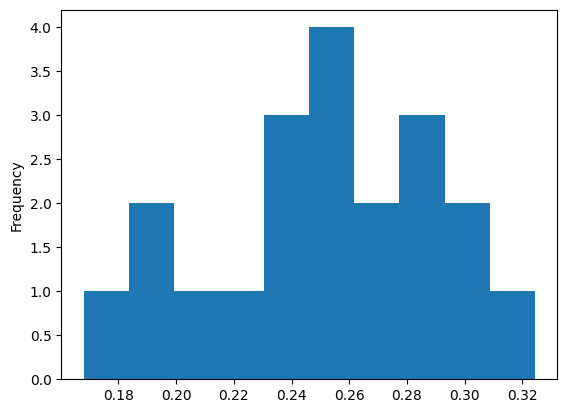

In [ ]:
# plotting the histogram from the sample dataframe
sample_df["gap"].plot(kind="hist")

The above distribution data is NOT GOOD for training a ML model. There is data missing from 0.20-0.22 eV. This is result in a ML model that is not reliable over that range. 

<Axes: ylabel='Frequency'>

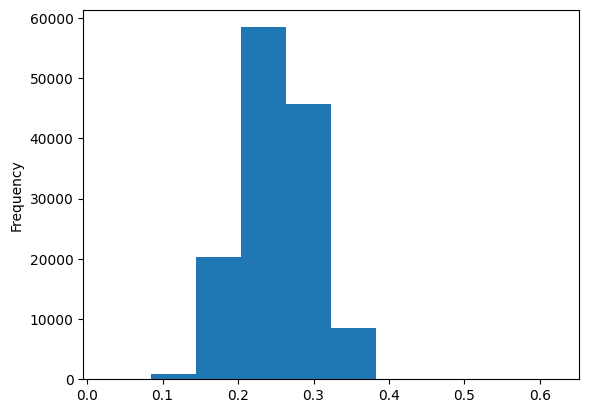

In [ ]:
# Looking at the whole QM9 dataset
df["gap"].plot(kind="hist")

This distribution is more NORMAL than the one above. Hence, this is a good dataset for ML model training.

If you want to look at how to plot data from pandas dataframe, you can watch [this video](https://www.youtube.com/watch?v=hNNRVRmZO1s&t=3883s) from a Chemistry with Code workshop